In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import pandas as pd
from scipy.stats import norm

# Q1A

Matlab Code:

    function X = cauchyrnd(n,m)
    U = rand(n,m);
    X = tan(pi*(U - 1/2));

In [25]:
def cauchyrnd(n,m):
    U = np.random.rand(n,m)
    X = np.tan(np.pi* (U - 1/2))
    return X

# Q1B

# Q2: Maximum Likelihood Estimation

# Q2A

Matlab Code:

    xvar = randn(10,1);
    mu = [-1:0.001:1];theta=1:0.1:2;
    Lfun=0;
    for i=1:length(mu)
        for j = 1:length(theta)
            LikeliHoodFunction(i,j)=(1/theta(j))*exp(-1/2*(xvar-mu(i)*ones(size(xvar)))'*(xvar-mu(i)*ones(size(xvar))));
        end
    end
    figure(1)
    for ii = 1:size(LikeliHoodFunction,2)
    plot(mu,LikeliHoodFunction(:,ii));hold on
    yl = get(gca,'Ylim');
    p=line([0 0],[yl(1),yl(2)]);
    set(p,'color','r','linestyle','--')
    end
    
    
    xvar = randn(10,1);
    mu = [-1:0.001:1];theta=1:0.1:2;
    Lfun=0;
    for i=1:length(mu)
        for j = 1:length(theta)
            LikeliHoodFunction(i,j)=(1/theta(j))*exp(-1/2*(xvar-mu(i)*ones(size(xvar)))'*(xvar-mu(i)*ones(size(xvar))));
        end
    end
    figure(1)
    for ii = 1:size(LikeliHoodFunction,2)
    plot(mu,LikeliHoodFunction(:,ii));hold on
    yl = get(gca,'Ylim');
    p=line([0 0],[yl(1),yl(2)]);
    set(p,'color','r','linestyle','--')
    end

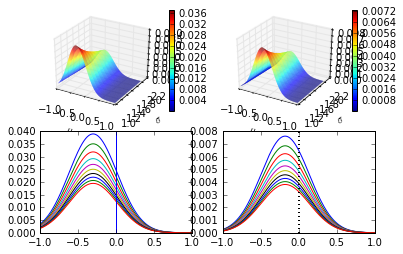

In [3]:
xvar = np.random.randn(10,1)
mus = np.linspace(-1,1,num=500);thetas = np.linspace(1,2,num=10)
LikeLiHoodFunctions = []
for theta in thetas:
    for mu in mus:
        temp = (1/theta)*np.exp(-1/2*np.dot((xvar - mu).T,(xvar - mu)))
        string = str(mu) + ',' + str(theta)
        LikeLiHoodFunctions.append(temp)

A, B = np.meshgrid(mus, thetas)

LikeLiHoodFunctions=np.array(LikeLiHoodFunctions).reshape(len(thetas),len(mus))

fig = plt.figure(1)
ax = fig.add_subplot(221, projection='3d')
surf=ax.plot_surface(A,B,LikeLiHoodFunctions,rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.xlabel('$\mu$');plt.ylabel('$\sigma$');
fig.colorbar(surf)

plt.subplot(223)
for row in LikeLiHoodFunctions:
    plt.plot(mus,row)
plt.axvline(0)
xvar = np.random.randn(10,1)
mus = np.linspace(-1,1,num=500);thetas = np.linspace(1,2,num=10)
LikeLiHoodFunctions = []
for theta in thetas:
    for mu in mus:
        temp = (1/theta)*np.exp(-1/2*np.dot((xvar - mu).T,(xvar - mu)))
        string = str(mu) + ',' + str(theta)
        LikeLiHoodFunctions.append(temp)

A, B = np.meshgrid(mus, thetas)

LikeLiHoodFunctions=np.array(LikeLiHoodFunctions).reshape(len(thetas),len(mus))

fig = plt.figure(1)
ax = fig.add_subplot(222, projection='3d')
surf=ax.plot_surface(A,B,LikeLiHoodFunctions,rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.xlabel('$\mu$');plt.ylabel('$\sigma$');
fig.colorbar(surf)

plt.subplot(224)
for row in LikeLiHoodFunctions:
    plt.plot(mus,row)
plt.axvline(0,color='black', lw=2, linestyle=':')

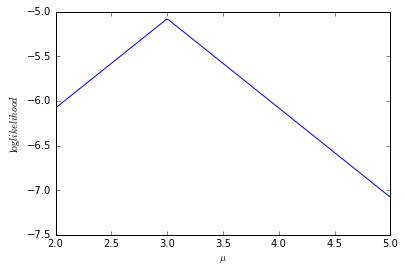

In [4]:
xvar=[3,5,2]
mus = np.linspace(min(xvar),max(xvar),200)
LikeLiHoodFunctions = lambda x,mu: 1/2*np.exp(-abs(x-mu))
logLikeliHoodFunction=[]
for mu in mus:
    mulplication=1
    for xx in xvar:
        mulplication = mulplication * LikeLiHoodFunctions(xx,mu)
    logLikeliHoodFunction.append(np.log(mulplication))

plt.plot(mus,logLikeliHoodFunction)
plt.xlabel('$\mu$')
plt.ylabel('$\loglikelihood$')

# Q3A 

Matlab Code:

    clear all;close all;clc
    dp=[0.5:0.5:40];
    c =dp./2;cnt = 1;
    for d = dp
    for ii = 1:1000
       [nHit, nMiss, nFA, nCR] = SDTgen(d,d/2,100,100,0);
       storage(:,ii,cnt) = [nHit, nMiss, nFA, nCR];
        end
        Count_Miss_FA(:,:,cnt) =storage([2,3],:,cnt); 
        cnt = cnt + 1;
    end
    Total_Miss_FA = sum(Count_Miss_FA,1);
    zero_Miss_FA = sum(Total_Miss_FA == 0,2);
    figure(1)
    plot(dp,zero_Miss_FA(:)./1000,'o');hold on
    xlabel('d prime')
    ylabel('Probability of getting zero counts of Miss and FA')
    xl = get(gca,'Xlim');
    p=line([xl(1),xl(2)],[0.1 0.1]);
    set(p,'color','r','linestyle','--')

In [5]:
def Bernoulli(p,M,N):
    Matrix = (np.random.rand(M,N) < p).astype(int)
    return Matrix
def SDTgen(dp,c,nSignal,nNoSignal):
    NoiseMean = 0
    SignalMean = NoiseMean + dp
    variance = 1+ np.random.rand(1) * dp
    nTrials = nSignal+nNoSignal
    if c < NoiseMean - 3*np.sqrt(variance) or c > SignalMean + 3 * np.sqrt(variance):
        print('please put in a reasonable value for criterion')
        return None
    xSignal = np.linspace(NoiseMean-3*dp,SignalMean+3*dp,nSignal)
    xNoise = np.linspace(NoiseMean-3*dp,SignalMean+3*dp,nNoSignal)
    noiseCDF = norm.cdf(xNoise,NoiseMean,variance)
    signalCDF = norm.cdf(xSignal,SignalMean,variance)
    noisePDF = np.diff(noiseCDF) / np.diff(xNoise)
    signalPDF = np.diff(signalCDF) / np.diff(xSignal)
    xx=Bernoulli(0.5,nTrials,1)
    stim = xx.reshape(1,nTrials)
    resp = []
    for i in range(nTrials):
        if stim[0][i] == NoiseMean:
            internalResponse = np.random.randn(1) * np.sqrt(variance) + NoiseMean
        else:
            internalResponse = np.random.randn(1) * np.sqrt(variance) + SignalMean
        resp.append((internalResponse > c).astype(int))
    resp=np.array(resp).reshape(1,nTrials)
    Hit_Signal=[];Hit_Noise=[];Miss_Signal=[];Miss_Noise=[]
    for i in range(len(resp[0])):
        if resp[0][i]==1 and stim[0][i]==1:
            Hit_Signal.append(1)
        elif resp[0][i]==1 and stim[0][i]==0:
            Hit_Noise.append(1)
        elif resp[0][i] ==0 and stim[0][i]==1:
            Miss_Signal.append(1)
        elif resp[0][i] == 0 and stim[0][i]==0:
            Miss_Noise.append(1)
    nHit=len(Hit_Signal);nMiss=len(Miss_Signal);nFA=len(Hit_Noise);nCR=len(Miss_Noise)
    return nHit, nMiss, nFA, nCR

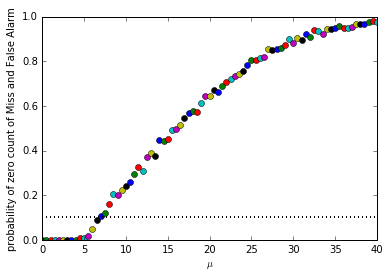

In [6]:
dp = np.arange(0,40.5,0.5)
storage=[]
cnt = 0
for d in dp:
    temp=[]
    string = str(d)
    for ii in range(1000):
        _,nMiss, nFA,_ = SDTgen(d,d*0.5,100,100)
        temp.append((nMiss+nFA))
    storage.append([d,sum((np.array(temp) == 0).astype(int))])
    cnt += 1

for row in storage:
    plt.plot(row[0],row[1]/1000,'o')
plt.axhline(0.1,color='black', lw=2, linestyle=':')
plt.xlabel('$\mu$');plt.ylabel('probability of zero count of Miss and False Alarm')

# Q3 B

# Q3 C

# Q4 A

Matlab Code:

    clear all;close all;clc
    trueSigma = 1;mus = 0:0.1:1;n=10;
    MLEtheta = @(x,mu,n) ((x-mu).^2)/n;
    MLES = @(x,mu,n) ((x-mu).^2)/(n-1);
    cnt = 1;
    for mu = mus
    data = normrnd(mu,trueSigma,n,1);
    MLE1 = MLEtheta(data,mu,n);
    MLE2 = MLES(data,mu,n);
    log_MLE1(cnt) = sum(log(MLE1));
    log_MLE2(cnt) = sum(log(MLE2));
    cnt = cnt +1;
    end
    figure(1)
    plot(mus,log_MLE1,'bo');hold on
    plot(mus, log_MLE2,'r*')
    legend('n','n-1')

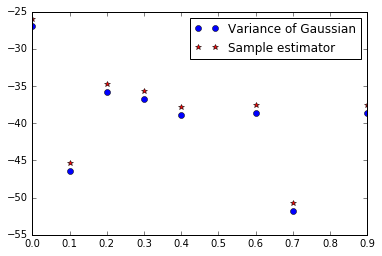

In [10]:
trueSigma = 1;mus = np.arange(0,1,0.1);n = 10;log_MLE1=[];log_MLE2=[]
MLEtheta = lambda x,mu,n: ((x-mu)**2)/n
MLEstd = lambda x,mu,n: ((x-mu)**2)/(n-1)
cnt = 1
for mu in mus:
    data = np.random.normal(mu, trueSigma,n)
    MLE1 = MLEtheta(data,mu, n)
    MLE2 = MLEstd(data, mu, n)
    log_MLE1.append(sum(np.log(MLE1)))
    log_MLE2.append(sum(np.log(MLE2)))
    
plt.figure(4)
plt.plot(mus,log_MLE1,'bo',label="Variance of Gaussian")
plt.plot(mus,log_MLE2,'r*',label="Sample estimator")
plt.legend()

# Q4 B

Matlab Code:

    clear all;close all;clc
    mu = 0; trueSigma=1;n = [10:1:4000];
    for j = 1:length(n)
    for ii = 1:100
    data = normrnd(mu,trueSigma,n(j),1);
    Sigma(ii,j) = sqrt(((data-mu)'*(data-mu))./(n(j)-1));

    end
    end
    expected_sigma=mean(Sigma,1);figure(2)
    plot(n,expected_sigma)
    X = get(gca,'xlim');
    L = line([X(1),X(2)],[1 1]);
    set(L,'Color','r','linewidth',2)
    xlabel('size of random sample')
    ylabel('expected sigma')

In [16]:
mu = 0; trueSigma=1;n=np.arange(10,4000,1);expected_sigma=[]
for samplesize in n:
    temp = []
    for ii in range(100):
        data = np.random.normal(mu, trueSigma,samplesize)
        temp.append(np.sqrt((np.dot((data-mu),(data-mu)))/(samplesize-1)))
    expected_sigma.append(np.mean(temp))

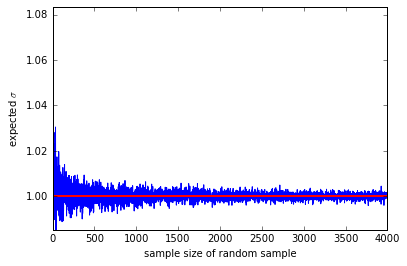

In [21]:
plt.plot(expected_sigma)
plt.axhline(1,color='red', lw=2, linestyle='-')
plt.ylim([min(expected_sigma),max(expected_sigma)])
plt.xlabel('sample size of random sample')
plt.ylabel('expected $\sigma$')

# Q5

Matlab Code:

    clear all;close all;clc
    mu = 0;Sigma = 1; n = 1000;
    data = normrnd(mu,Sigma,n,1);
    data2= cauchyrnd(n,1);
    ppRange = linspace(0.01,0.99,n);
    figure(1)
    plot(icdf('normal',ppRange,0,1),icdf('normal',ppRange,0,1));hold on
    plot(sort(data),icdf('normal',ppRange,0,1),'o')
    xlabel('Gaussian Distribution')
    ylabel('Gaussian Data Sample')
    figure(2)
    plot(icdf('normal',ppRange,0,1),icdf('normal',ppRange,0,1));hold on
    plot(sort(data2),icdf('normal',ppRange,0,1),'o')
    xlabel('Gaussian Distribution')
    ylabel('Cauchy Data Sample')

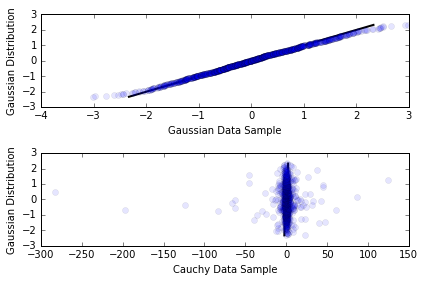

In [64]:
mu = 0;Sigma=1;n=1000
data = np.random.normal(mu,Sigma,n)
data2 = cauchyrnd(n,1)
xx = np.linspace(0.01,0.99,n)
fig=plt.figure(5)
fig.subplots_adjust(bottom=0.2,wspace=0.6)
plt.subplot(211)
line=plt.plot(norm.ppf(xx,0,1),norm.ppf(xx,0,1))
plt.setp(line,linewidth=2,color='black')
plt.plot(np.sort(data),norm.ppf(xx,0,1),'bo',alpha=0.1)
plt.ylabel('Gaussian Distribution')
plt.xlabel('Gaussian Data Sample')
plt.subplot(212)
line=plt.plot(norm.ppf(xx,0,1),norm.ppf(xx,0,1))
plt.setp(line,linewidth=2,color='black')
plt.plot(np.sort(data2),norm.ppf(xx,0,1),'bo',alpha=0.1)
plt.ylabel('Gaussian Distribution')
plt.xlabel('Cauchy Data Sample')
plt.tight_layout()